In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Zomato.csv')
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
data.shape

(148, 7)

In [4]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [7]:
data.dtypes

,0
name,object
online_order,object
book_table,object
rate,object
votes,int64
approx_cost(for two people),int64
listed_in(type),object


In [8]:
data["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

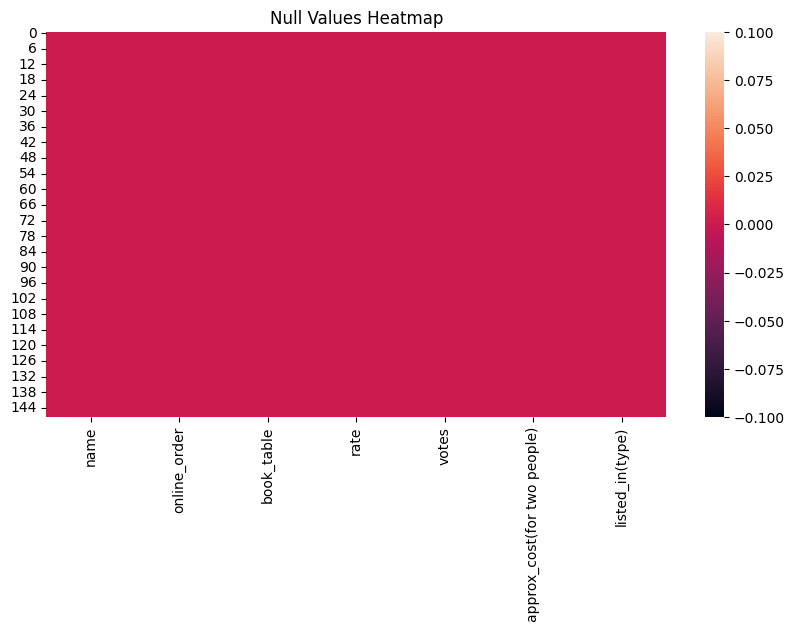

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())
plt.title("Null Values Heatmap")
plt.show()

In [10]:
(data==np.inf).sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [11]:
(data==-np.inf).sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [12]:
data.duplicated().sum()

np.int64(0)

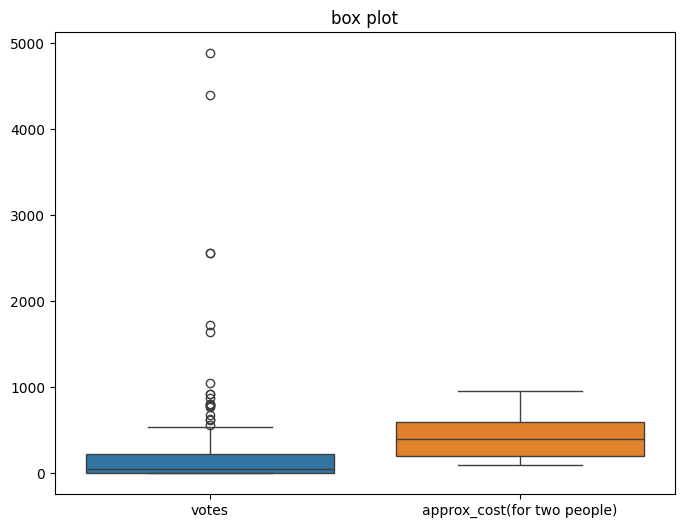

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data)
plt.title("box plot")
plt.show()

In [14]:
data['name']=data['name'].astype('string')

In [15]:
data['listed_in(type)']=data['listed_in(type)'].astype('string')

In [16]:
Q1=data['votes'].quantile(0.25)
Q3=data['votes'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

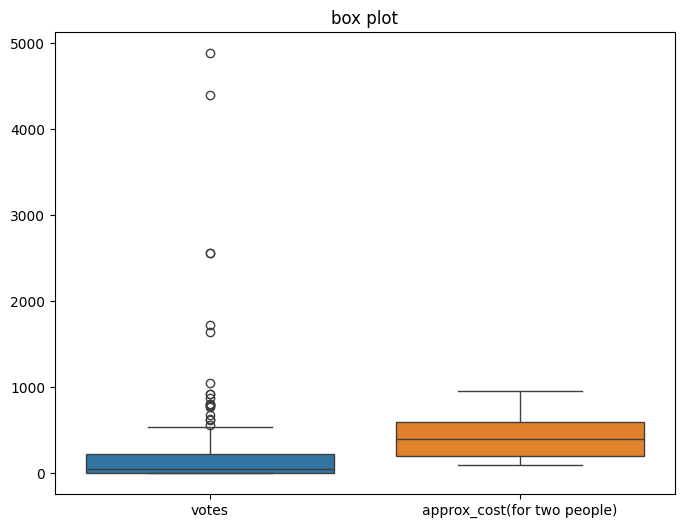

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data)
plt.title("box plot")
plt.show()

<Axes: ylabel='count'>

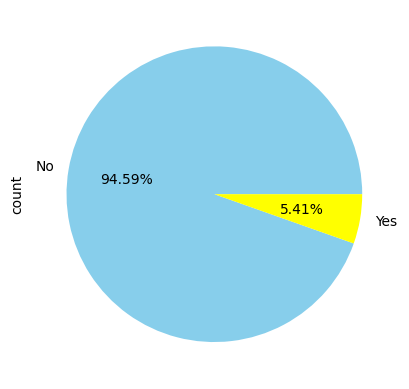

In [18]:
data['book_table'].value_counts().plot.pie(autopct='%.2f%%',colors=['#87CEEB','#FFFF00'])

<Axes: ylabel='count'>

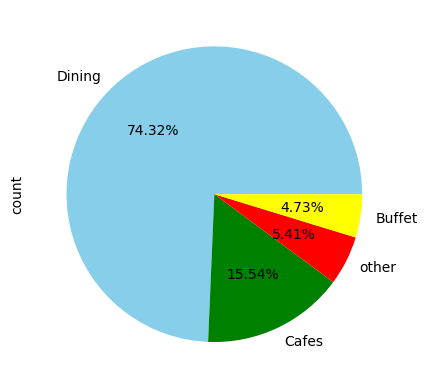

In [24]:
data['listed_in(type)'].value_counts().plot.pie(autopct='%.2f%%',colors=['#87CEEB','#008000','#ff0000','#FFFF00'])

In [25]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

<Axes: xlabel='online_order', ylabel='listed_in(type)'>

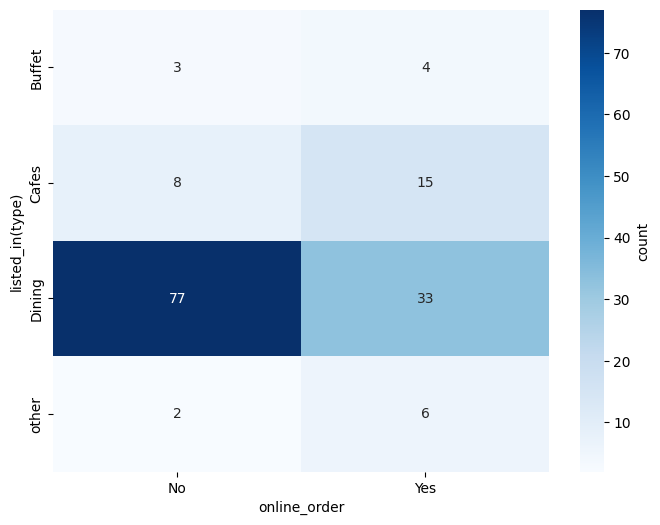

In [29]:
cross_tab = pd.crosstab(data['listed_in(type)'],data['online_order'])
plt.figure(figsize=(8,6))
sns.heatmap(cross_tab,annot=True,cmap='Blues',fmt='d',cbar_kws={'label':"count"})

In [30]:
pd.crosstab(data['listed_in(type)'],data['book_table'])

book_table,No,Yes
listed_in(type),,
Buffet,6,1
Cafes,20,3
Dining,108,2
other,6,2


<Axes: xlabel='online_order', ylabel='count'>

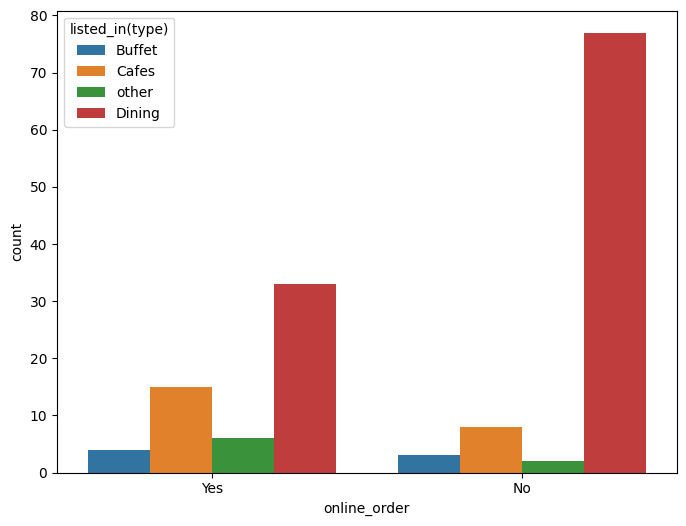

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='online_order',data=data,hue='listed_in(type)')

In [32]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [33]:
data['book_table'] = data['book_table'].map({'Yes':1,'No':0})

In [34]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,1,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,0,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,0,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,0,3.7/5,88,300,Buffet
4,Grand Village,No,0,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,0,3.3/5,0,100,Dining
144,New Indraprasta,No,0,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,0,4.0/5,771,450,Dining
146,Darbar,No,0,3.0/5,98,800,Dining


<Axes: ylabel='count'>

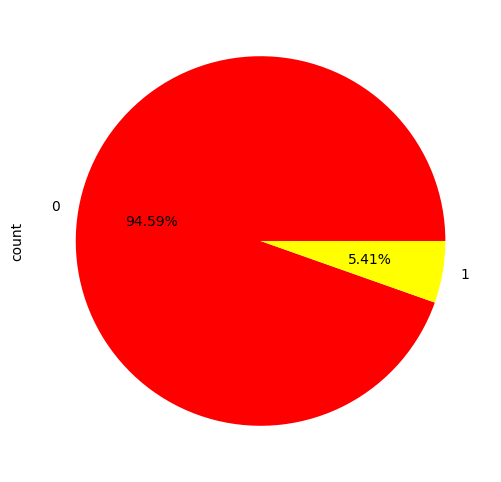

In [36]:
plt.figure(figsize=(8,6))
data['book_table'].value_counts().plot.pie(autopct='%.2f%%',colors=['#ff0000','#FFFF00'])

In [37]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

<Axes: ylabel='count'>

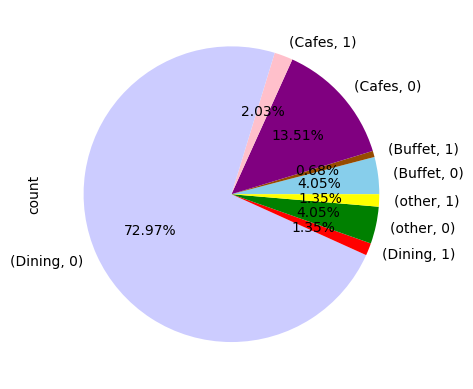

In [43]:
(data.groupby('listed_in(type)')['book_table']).value_counts().plot.pie(autopct='%.2f%%',colors=['#87CEEB','#964B00','#800080','#FFC0CB','#CCCCFF','#ff0000','#008000','#FFFF00'])

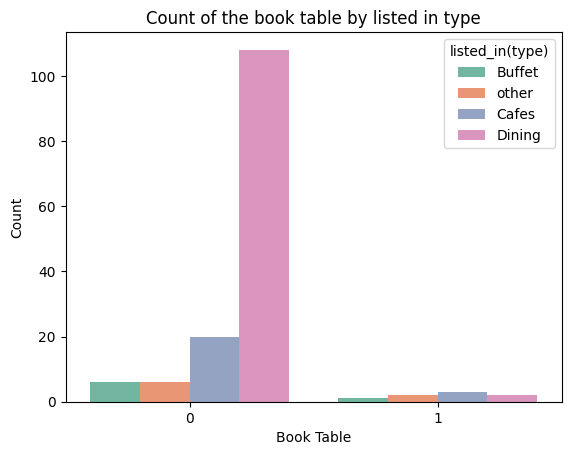

In [44]:
sns.countplot(x='book_table',data=data,hue='listed_in(type)',palette='Set2')
plt.title("Count of the book table by listed in type")
plt.xlabel("Book Table")
plt.ylabel("Count")
plt.show()